In [1]:
!nvidia-smi;

import numpy as np
import os
import numpy.random as random
import matplotlib as mpl
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras
import tensorflow.keras.layers as layers
import tensorflow.keras.models as models


from tensorflow.keras.layers import Dense, Input, Flatten, Reshape
from tensorflow.keras.layers import GaussianNoise, Dropout
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split
K = tensorflow.keras.backend
from umap import UMAP

import numpy as np
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
%load_ext autoreload
%autoreload 2
import matplotlib 
matplotlib.rcParams['figure.figsize'] = (12.0, 8.0)
import os 

import h5py 
import matplotlib.pyplot as plt
import numpy as np
import glob
from scipy.ndimage import median_filter
import time
%matplotlib notebook
import pandas as pd
from numpy import save

'nvidia-smi' is not recognized as an internal or external command,
operable program or batch file.


In [33]:
eh5 = np.load('diego_mocap_files_rat_JDM31_day_13_nan.npy')

<IPython.core.display.Javascript object>


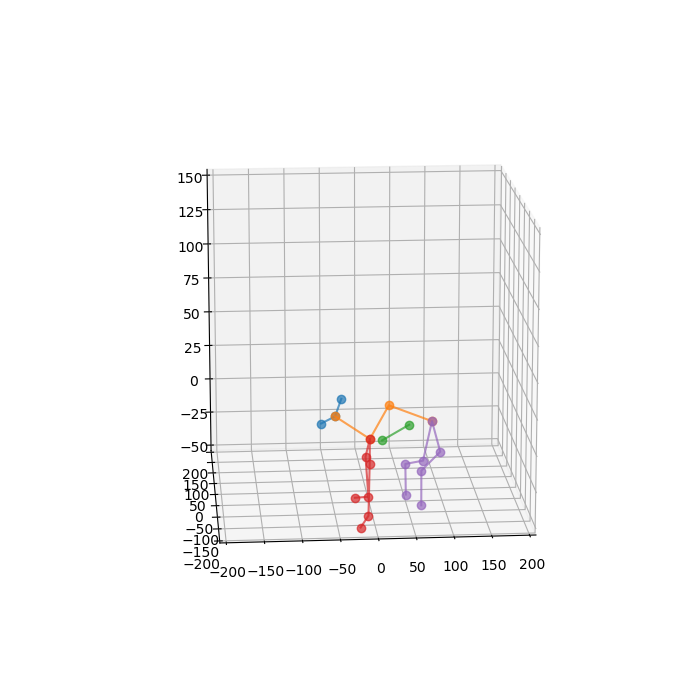

In [39]:
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook

connections = [[5, 4, 6], [4,17,19, 18], [11,12], [0,2,15,17,16,3,1], [13,9,7,18,8,10,14]]


ts = eh5.reshape((-1,20,3)) #
skipevery = 1


fig = plt.figure(figsize=(7,7))
ax1 = fig.add_subplot(111, projection='3d')
# fig.show()
fig.canvas.draw()
t = 1000
#for t in range(1,eh5.shape[0], 57):#goodsinraw[::60]:
ax1.clear()
for conn in connections:
    ax1.plot(ts[t*skipevery,conn,0],ts[t*skipevery,conn,1], ts[t*skipevery,conn,2], 'o-', alpha=0.7)
    ax1.set_xlim([-200, 200])
    ax1.set_ylim([-200, 200])
    ax1.set_zlim([-50, 150])
    

    fig.canvas.draw()   

Folder = 'C:\\Users\\14692\\RatDataSimulation\\'
plt.savefig(Folder + 'Rat Missing Posture Picture1.png')

In [42]:
eh5 = np.load('diego_mocap_files_rat_JDM31_day_13_interpolate_centered.npy')

<IPython.core.display.Javascript object>


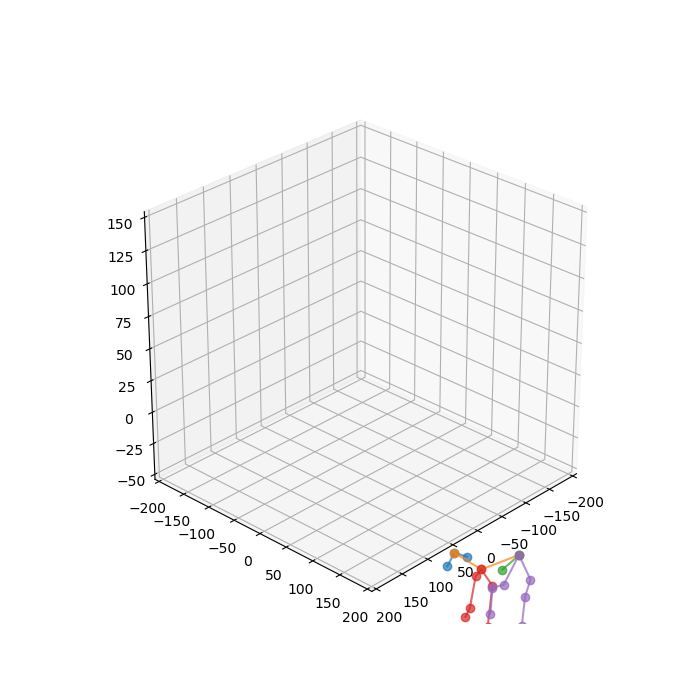

In [32]:
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook

connections = [[5, 4, 6], [4,17,18], [11,12], [0,2,15,17,16,3,1], [13,9,7,18,8,10,14]]


ts = eh5.reshape((-1,19,3)) #
skipevery = 101


fig = plt.figure(figsize=(7,7))
ax1 = fig.add_subplot(111, projection='3d')
# fig.show()
fig.canvas.draw()
t = 1
#for t in range(1,eh5.shape[0], 57):#goodsinraw[::60]:
ax1.clear()
for conn in connections:
    ax1.plot(ts[t*skipevery,conn,0],ts[t*skipevery,conn,1], ts[t*skipevery,conn,2], 'o-', alpha=0.7)
    ax1.set_xlim([-200, 200])
    ax1.set_ylim([-200, 200])
    ax1.set_zlim([-50, 150])
    

    fig.canvas.draw()   

Folder = 'C:\\Users\\14692\\RatDataSimulation\\'
plt.savefig(Folder + 'Rat Magnified Posture Picture.png')

In [41]:
eh5.shape

(19980000, 60)

<IPython.core.display.Javascript object>


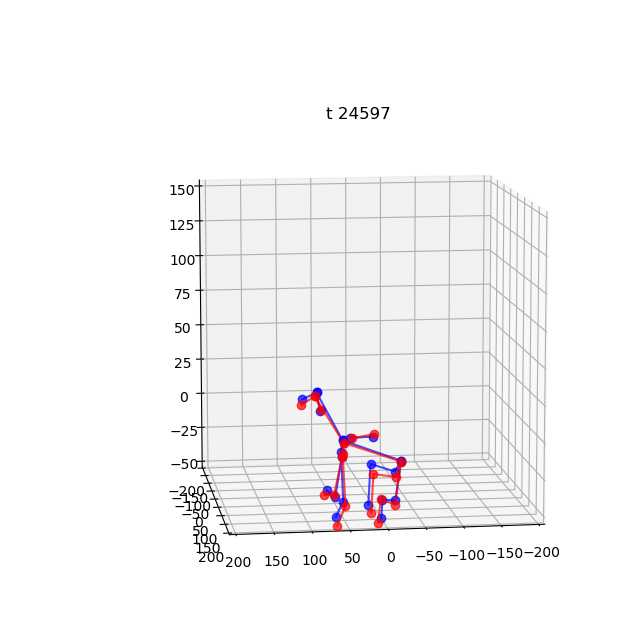

KeyboardInterrupt: 

In [72]:
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook


connections = [[5, 4, 6], [4,17,18], [11,12], [0,2,15,17,16,3,1], [13,9,7,18,8,10,14]]


ts = eh5.reshape((-1,19,3)) #
tw = predictedX_eh5.reshape((-1,19,3))
skipevery = 10


fig = plt.figure(figsize=(7,7))
ax1 = fig.add_subplot(111, projection='3d')
# fig.show()
fig.canvas.draw()
count = 0
for t in range(12000,eh5.shape[0], 57):#goodsinraw[::60]:
    ax1.clear()
    for conn in connections:
        ax1.plot(ts[t*skipevery,conn,0],ts[t*skipevery,conn,1], ts[t*skipevery,conn,2], 'o-', alpha=0.7, color = 'blue')
        ax1.plot(tw[t*skipevery,conn,0],tw[t*skipevery,conn,1], tw[t*skipevery,conn,2], 'o-', alpha=0.7, color = 'red')
    ax1.set_xlim([-200, 200])
    ax1.set_ylim([-200, 200])
    ax1.set_zlim([-50, 150])
    ax1.view_init(10, count/0.5)
    count += 1
    ax1.set_title('t %i'%(t*1))
    #plt.savefig("C:\\Users\\14692\\RatDataSimulation\graphofrodents1\\" + str(t) +".png", format="PNG")
    

    fig.canvas.draw()   

In [47]:
variational_ae = tf.keras.models.load_model('saved_model/four_layer_8')
print("Generate predictions for Interpolate centered data")
predictedX_eh5 = variational_ae.predict(eh5)

Generate predictions for Interpolate centered data


In [53]:
predictedX_eh5.shape

(19980000, 57)

<IPython.core.display.Javascript object>


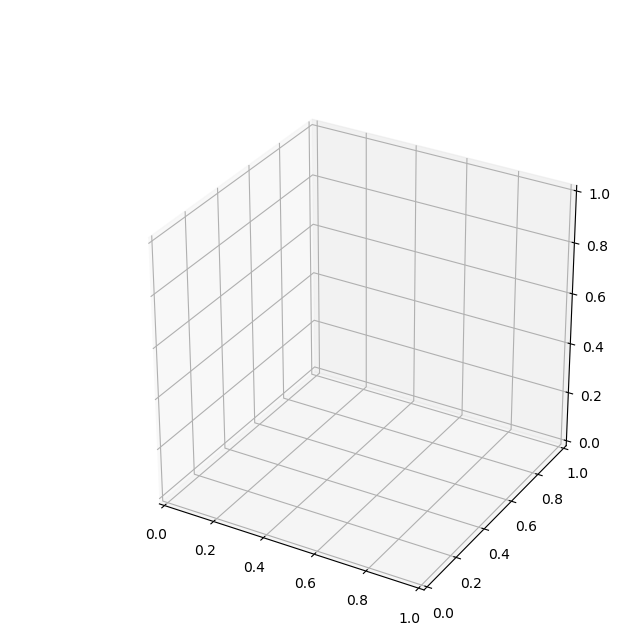

KeyboardInterrupt: 

In [50]:
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook

connections = [[5, 4, 6], [4,17,18], [11,12], [0,2,15,17,16,3,1], [13,9,7,18,8,10,14]]


ts = eh5.reshape((-1,19,3)) #Nan filled with VAE prediction
tw = predictedX_eh5.reshape((-1,19,3)) # Original
skipevery = 1


fig = plt.figure(figsize=(7,7))
ax1 = fig.add_subplot(111, projection='3d')
# fig.show()
fig.canvas.draw()
count = 0
for t in range(1,eh5.shape[0], 57):
    ax1.clear()
    for conn in connections:
        ax1.plot(ts[t*skipevery,conn,0],ts[t*skipevery,conn,1], ts[t*skipevery,conn,2], 'o-', alpha=0.7, color = 'red')
        ax1.plot(tw[t*skipevery,conn,0],tw[t*skipevery,conn,1], tw[t*skipevery,conn,2], 'o-', alpha=0.7, color = 'blue')
    ax1.set_xlim([-200, 200])
    ax1.set_ylim([-200, 200])
    ax1.set_zlim([-50, 150])
    ax1.view_init(10, count/0.5)
    count += 1
    ax1.set_title('t %i'%(t*1)) 